In [ ]:
# 3.1 Tasks
# Problem 1 data read write and inspect
  #1. load the provided dataset and import in pandas dataframe
import pandas as pd
bank_df=pd.read_csv("/content/drive/MyDrive/bank .csv")

  #2. Check info of the DataFrame and identify following:
      #(a) columns with dtypes=object
      #(b) unique values of those columns.
      #(c) check for the total number of null values in each column.
bank_df.info()

obj_clm=bank_df.select_dtypes(include=["object"]).columns
print("Columns with dtype object: ",obj_clm)

for col in obj_clm:
  print(f"Unique calues in {col}: ",bank_df[col].unique())

print("Null values in each column : \n",bank_df.isnull().sum())

  #3. Drop all columns with dtype=object and save to new DataFrame

bank_numdf=bank_df.drop(columns=obj_clm)
bank_numdf.to_csv("banknumericdata.csv")

 #4. Read the saved csv and find summary statistics

bank_num_df = pd.read_csv("banknumericdata.csv")
print("\n Summary Statistics: \n")
bank_num_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Columns with dtype object:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'co

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Problem 2
#1. Load the dataset
import pandas as pd
med_df = pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv")

#2. Check info and identify columns with missing values
med_df.info()
miss_clm=med_df.columns[med_df.isnull().any()]
print("Columns with missing values: ",miss_clm)

for col in miss_clm:
  if med_df[col].dtype == 'object':
        med_df[col] = med_df[col].fillna(med_df[col].mode()[0]) #replaces all nan values with the mode value
  else:
        med_df[col] = med_df[col].fillna(med_df[col].mean()) #

#4. check for duplicate values and handle them
dup = med_df.duplicated().sum()
print(f"Number of duplicated rows: {dup}")
med_df=med_df.drop_duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Columns with missing values:  Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', '

In [ ]:
#3.2 Tasks
#Problem 1
#Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
#Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
#median, maximum value, and minimum value of the ’Fare’ column?

import pandas as pd

t_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
sub_df = t_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
cls_df = sub_df[sub_df["Pclass"]==1]

f_mean=cls_df["Fare"].mean()
f_median=cls_df["Fare"].median()
f_max=cls_df["Fare"].max()
f_min=cls_df["Fare"].min()

print(f"Mean Fare: {f_mean}")
print(f"Median Fare: {f_median}")
print(f"Maximum Fare: {f_max}")
print(f"Minimum Fare: {f_min}")

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [ ]:
#Problem 2
#How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
#this out, drop them from your DataFrame.
nage_count=t_df["Age"].isnull().sum()
print(f"Number of null values in Age column :\n {nage_count}")

drp_df=t_df.dropna(subset=["Age"])
print(f"DataFrame after dropping null values:\n {drp_df}")

Number of null values in Age column :
 0
DataFrame after dropping null values:
      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0

In [ ]:
#Problem 3
# The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-tion:
# • ’C’ for Cherbourg
# • ’Q’ for Queenstown
# # • ’S’ for Southampton
# Task:
# 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,’Embarked Q’, ’Embarked S’).
# 2. Add these new columns to the original DataFrame.
# 3. Drop the original ’Embarked’ column.
# 4. Print the first few rows of the modified DataFrame to verify the changes.
#one hot coding converts categorical data into numerical format for ml or analysis
t_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
emb_dum=pd.get_dummies(t_df["Embarked"], prefix="Embarked")
t_df=pd.concat([t_df, emb_dum],axis=1)

t_df.drop(columns=["Embarked"],inplace=True)
print(t_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean survival rates by Gender: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<Axes: xlabel='Survived'>

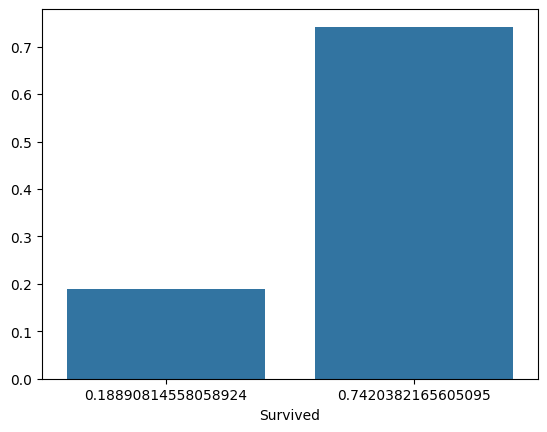

In [ ]:
#Problem 4
#Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

import pandas as pd
import seaborn as sns
t_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
surv_rate_gen=t_df.groupby("Sex")["Survived"].mean()
print("Mean survival rates by Gender: ")
print(surv_rate_gen)

sns.barplot(x=surv_rate_gen, y=surv_rate_gen.values)

<Axes: xlabel='Embarked', ylabel='Survived'>

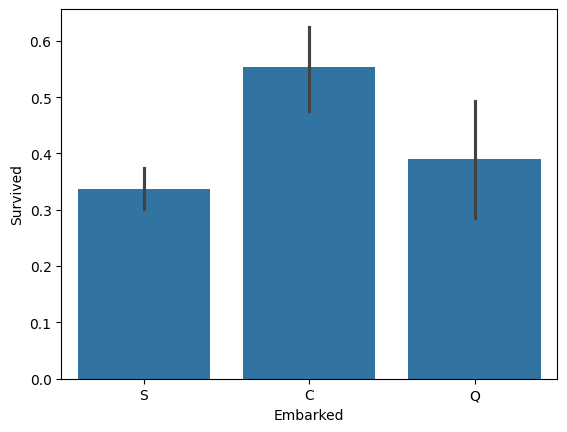

In [ ]:
#Problem 5
#Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
import pandas as pd
t_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
t_df=t_df[t_df["Embarked"].isin(["C","Q","S"])]

sns.barplot(data=t_df, x="Embarked", y="Survived")

<ipython-input-16-6e03801a6c24>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_data=t_df.groupby(["Age Group","Pclass"])["Survived"].mean().reset_index()


<Axes: xlabel='Age Group', ylabel='Survived'>

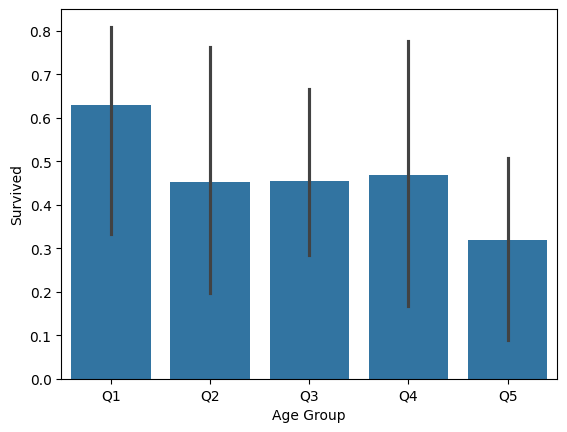

In [ ]:
#Problem 6
#Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the’Age’column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.
import pandas as pd
import seaborn as sns
t_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

t_df=t_df.dropna(subset=["Age"])

t_df["Age Group"]=pd.qcut(t_df["Age"], q=5, labels=["Q1","Q2","Q3","Q4","Q5"])
# q=5 tells pandas to split age into 5
grp_data=t_df.groupby(["Age Group","Pclass"])["Survived"].mean().reset_index()
#groups dataframe by age group and passenger class then survived ko mean nikalinxa and ako result lai back into dataframe lanxa index reset garera plotting ko lai use hos vanerw
sns.barplot(data=grp_data, x='Age Group', y='Survived')
